In [1]:
import re
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(1)

import requests
import io

def get_data(url):
    s=requests.get(url).content
    return pd.read_csv(io.StringIO(s.decode('utf-8')))

In [2]:
df = get_data("https://api.covid19india.org/csv/latest/state_wise_daily.csv")

In [3]:
df.tail()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
1372,14-Jun-21,2021-06-14,Recovered,117376,9,10114,356,4299,851,61,...,1650,1231,281,25561,2175,610,1116,990,2171,0
1373,14-Jun-21,2021-06-14,Deceased,2733,0,59,6,43,13,2,...,40,20,0,254,12,7,72,25,78,0
1374,15-Jun-21,2021-06-15,Confirmed,62214,11,5741,290,3415,410,40,...,628,172,209,11805,1556,528,270,274,3268,0
1375,15-Jun-21,2021-06-15,Recovered,107767,15,10567,326,2906,813,58,...,1691,1006,272,23207,2070,743,1104,515,2068,0
1376,15-Jun-21,2021-06-15,Deceased,2540,0,53,4,34,9,3,...,48,14,3,267,14,4,56,25,75,0


In [4]:
df = df[df['Status']=='Confirmed']
df.head(-1)

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
6,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
12,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,10-Jun-21,2021-06-10,Confirmed,91849,29,8110,245,3756,551,66,...,1311,538,287,16813,1798,658,596,388,5274,0
1362,11-Jun-21,2021-06-11,Confirmed,84574,36,8239,358,3666,566,70,...,1201,446,147,15759,1707,641,596,287,4883,0
1365,12-Jun-21,2021-06-12,Confirmed,80525,10,6952,298,3463,432,58,...,961,368,167,15108,1771,428,504,463,4286,0
1368,13-Jun-21,2021-06-13,Confirmed,71001,18,6770,134,2167,487,54,...,956,308,157,14016,1280,565,452,263,3984,0


In [5]:
df = df.drop(['Status'], axis=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
df.reset_index()
df = df.set_index("Date")
df

,Date_YMD,TT,AN,AP,AR,AS,BR,CH,CT,DN,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
Date,,,,,,,,,,,,,,,,,,,,,
14-Mar-20,2020-03-14,81,0,1,0,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
15-Mar-20,2020-03-15,27,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
16-Mar-20,2020-03-16,15,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
17-Mar-20,2020-03-17,11,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
18-Mar-20,2020-03-18,37,0,0,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11-Jun-21,2021-06-11,84574,36,8239,358,3666,566,70,741,8,...,1201,446,147,15759,1707,641,596,287,4883,0
12-Jun-21,2021-06-12,80525,10,6952,298,3463,432,58,813,5,...,961,368,167,15108,1771,428,504,463,4286,0
13-Jun-21,2021-06-13,71001,18,6770,134,2167,487,54,459,0,...,956,308,157,14016,1280,565,452,263,3984,0


In [8]:
df['PB']

Date
14-Mar-20       1
15-Mar-20       0
16-Mar-20       0
17-Mar-20       0
18-Mar-20       1
             ... 
11-Jun-21    1201
12-Jun-21     961
13-Jun-21     956
14-Jun-21     622
15-Jun-21     628
Name: PB, Length: 459, dtype: int64

In [9]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

trace1 = go.Scatter(x=df.index,
                    y=df['PB'],
                    name = "daily confirmed cases PUNJAB"
        
                    )

layout = dict(title='Dail Confirm PUNJAB',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

In [10]:
len(df)

459

In [11]:
close_data=df
len(close_data)

459

In [12]:
x=len(close_data)-60
x

399

In [13]:
close_data = df['PB'].values
close_data = close_data.reshape((-1,1))


close_train = close_data[:x]
close_test = close_data[x:]

date_train = df.index[:x]
date_test = df.index[x:]

print(len(close_train))
print(len(close_test))

399
60


In [14]:
close_data1 = df.drop(df.index[range(399)])
close_data1
close_data1=close_data1.drop(close_data1.index[-1])
len(close_data1)

59

In [15]:
close_data2=close_data1

In [16]:
close_data2
len(close_data2)
close_data2=close_data2['PB'].values
close_data2 = close_data2.reshape((-1,1))

In [17]:
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator

In [18]:

look_back = 1

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test,length=look_back, batch_size=20)


In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(40,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

num_epochs = 20 
model.fit(train_generator, epochs=num_epochs, verbose=2)


Epoch 1/20
20/20 - 0s - loss: 1285761.7500 - accuracy: 0.0176
Epoch 2/20
20/20 - 0s - loss: 1235976.0000 - accuracy: 0.0176
Epoch 3/20
20/20 - 0s - loss: 1142534.8750 - accuracy: 0.0176
Epoch 4/20
20/20 - 0s - loss: 1086494.5000 - accuracy: 0.0176
Epoch 5/20
20/20 - 0s - loss: 1061839.2500 - accuracy: 0.0201
Epoch 6/20
20/20 - 0s - loss: 973377.6250 - accuracy: 0.0201
Epoch 7/20
20/20 - 0s - loss: 861900.2500 - accuracy: 0.0176
Epoch 8/20
20/20 - 0s - loss: 794279.1250 - accuracy: 0.0201
Epoch 9/20
20/20 - 0s - loss: 740206.0000 - accuracy: 0.0226
Epoch 10/20
20/20 - 0s - loss: 689745.4375 - accuracy: 0.0226
Epoch 11/20
20/20 - 0s - loss: 318712.6562 - accuracy: 0.0226
Epoch 12/20
20/20 - 0s - loss: 198839.2344 - accuracy: 0.0226
Epoch 13/20
20/20 - 0s - loss: 153130.6094 - accuracy: 0.0176
Epoch 14/20
20/20 - 0s - loss: 105271.6953 - accuracy: 0.0176
Epoch 15/20
20/20 - 0s - loss: 86332.9531 - accuracy: 0.0176
Epoch 16/20
20/20 - 0s - loss: 64171.1211 - accuracy: 0.0176
Epoch 17/20
20

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


In [21]:
prediction = model.predict(test_generator)


close_train = close_train.reshape((-1))
close_data2 = close_data2.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Training Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_data2,
    mode='lines',
    name = 'Testing Data'
)
layout = go.Layout(
    title = "Daily Confirmed Covid cases Prediction PUNJAB",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

In [22]:
prediction = model.predict(test_generator)
close_train = close_train.reshape((-1))
close_data2 = close_data2.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_test,
    y = close_data2,
    mode = 'lines',
    name = 'Daily confirmed',
    
    
    
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Predicted confirm',
    line = dict(color = 'red')
    
)

layout = go.Layout(
    title = "Daily predicted Confirmed Covid cases of INDIA",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

In [23]:
prediction = prediction.reshape((-1))
prediction

array([4219.7803, 4666.3306, 4401.6377, 4434.0103, 4716.7935, 5190.0034,
       6406.8296, 5392.808 , 6646.767 , 5976.4653, 5633.6978, 6574.405 ,
       6403.021 , 5773.6606, 6681.9956, 6932.4067, 6448.723 , 7155.206 ,
       7573.193 , 8418.6875, 7900.726 , 8610.066 , 8033.0728, 8140.664 ,
       8183.5093, 7875.9707, 8008.317 , 7651.2676, 6447.771 , 6618.2036,
       6552.5063, 6728.651 , 6001.221 , 5208.094 , 5002.433 , 5044.327 ,
       4781.5386, 4267.386 , 4529.223 , 3813.2195, 3670.3997, 3529.484 ,
       2891.5547, 2461.1907, 2087.9546, 2047.0128, 2108.9016, 2042.2522,
       1909.9056, 1788.9847, 1489.0629, 1209.1357, 1192.9493, 1327.2002,
       1249.1254, 1144.3907,  915.8781,  911.1174,  593.0618],
      dtype=float32)

In [24]:
df= pd.DataFrame( columns =['Daily Confirmed','Daily Confpred'],index=date_test)
print("\nPandas DataFrame: ")
df
df = df.drop(df.index[-1])


Pandas DataFrame: 


In [25]:
df.loc[:,"Daily Confirmed"] = close_data2
df.loc[:,"Daily Confpred"]=prediction
df

,Daily Confirmed,Daily Confpred
Date,,
17-Apr-21,4431,4219.780273
18-Apr-21,4900,4666.330566
19-Apr-21,4622,4401.637695
20-Apr-21,4656,4434.010254
21-Apr-21,4953,4716.793457
22-Apr-21,5450,5190.003418
23-Apr-21,6728,6406.829590
24-Apr-21,5663,5392.808105
25-Apr-21,6980,6646.767090


In [26]:
from sklearn.metrics import mean_squared_error
import math
print('RMSE: ', math.sqrt(mean_squared_error(df['Daily Confirmed'], df['Daily Confpred'])))
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(df['Daily Confirmed'], df['Daily Confpred']))


RMSE:  268.9781070763464
MAE:  240.7431754419359


In [27]:
MAPE = np.mean(np.abs(np.array(df["Daily Confirmed"][:59]) - np.array(df["Daily Confpred"][:59]))/np.array(df["Daily Confirmed"][:59]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 4.758845170912393 %


In [28]:
sum_errs = np.sum((np.array(df["Daily Confirmed"][:59]) - np.array(df["Daily Confpred"][:59]))**2)
sum_errs

4268604.103096094

In [29]:
stdev = np.sqrt(1/(5-2) * sum_errs)
stdev

1192.8403222415666

In [30]:
# calculate prediction interval
interval = 1.96 * stdev
interval

2337.9670315934704

In [31]:
df["confirm_min"] = df["Daily Confpred"] - interval
df["confirm_max"] = df["Daily Confpred"] + interval
df

,Daily Confirmed,Daily Confpred,confirm_min,confirm_max
Date,,,,
17-Apr-21,4431,4219.780273,1881.813232,6557.747070
18-Apr-21,4900,4666.330566,2328.363525,7004.297852
19-Apr-21,4622,4401.637695,2063.670654,6739.604492
20-Apr-21,4656,4434.010254,2096.043213,6771.977539
21-Apr-21,4953,4716.793457,2378.826416,7054.760742
22-Apr-21,5450,5190.003418,2852.036377,7527.970703
23-Apr-21,6728,6406.829590,4068.862549,8744.796875
24-Apr-21,5663,5392.808105,3054.841064,7730.775391
25-Apr-21,6980,6646.767090,4308.799805,8984.734375


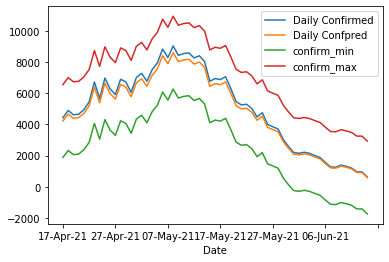

In [32]:
df.plot()

In [33]:
df["Model Accuracy"] = round((1-MAPE),2)
df

,Daily Confirmed,Daily Confpred,confirm_min,confirm_max,Model Accuracy
Date,,,,,
17-Apr-21,4431,4219.780273,1881.813232,6557.747070,0.95
18-Apr-21,4900,4666.330566,2328.363525,7004.297852,0.95
19-Apr-21,4622,4401.637695,2063.670654,6739.604492,0.95
20-Apr-21,4656,4434.010254,2096.043213,6771.977539,0.95
21-Apr-21,4953,4716.793457,2378.826416,7054.760742,0.95
22-Apr-21,5450,5190.003418,2852.036377,7527.970703,0.95
23-Apr-21,6728,6406.829590,4068.862549,8744.796875,0.95
24-Apr-21,5663,5392.808105,3054.841064,7730.775391,0.95
25-Apr-21,6980,6646.767090,4308.799805,8984.734375,0.95
